In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display

In [2]:
# load the data
df = pd.read_csv(r'C:\Users\soory\Downloads\images\trainData.csv')

In [3]:
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,49,1,nonanginal,118,149,0,2,126,0,0.8,1,3.0,normal,Yes
1,63,0,asymptomatic,108,269,0,0,169,1,1.8,2,2.0,normal,Yes
2,59,1,typical,160,273,0,2,125,0,0.0,1,0.0,normal,Yes
3,59,1,asymptomatic,140,177,0,0,162,1,0.0,1,1.0,reversable,Yes
4,47,1,nonanginal,108,243,0,0,152,0,0.0,1,0.0,normal,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,43,0,asymptomatic,132,341,1,2,136,1,3.0,2,0.0,reversable,Yes
313,63,1,asymptomatic,140,187,0,2,144,1,4.0,1,2.0,reversable,Yes
314,58,1,nonanginal,140,211,1,2,165,0,0.0,1,0.0,normal,No
315,63,0,asymptomatic,108,269,0,0,169,1,1.8,2,2.0,normal,Yes


In [5]:
df.duplicated().sum()

80

In [6]:
df=df.drop_duplicates()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 316
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        237 non-null    int64  
 1   Sex        237 non-null    int64  
 2   ChestPain  237 non-null    object 
 3   RestBP     237 non-null    int64  
 4   Chol       237 non-null    int64  
 5   Fbs        237 non-null    int64  
 6   RestECG    237 non-null    int64  
 7   MaxHR      237 non-null    int64  
 8   ExAng      237 non-null    int64  
 9   Oldpeak    237 non-null    float64
 10  Slope      237 non-null    int64  
 11  Ca         234 non-null    float64
 12  Thal       237 non-null    object 
 13  AHD        237 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 27.8+ KB


In [9]:
df['AHD']=df['AHD'].apply(lambda x : 1 if x=='Yes' else 0)

C:\Users\soory\AppData\Local\Temp\ipykernel_4652\4188910922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AHD']=df['AHD'].apply(lambda x : 1 if x=='Yes' else 0)


In [10]:
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,49,1,nonanginal,118,149,0,2,126,0,0.8,1,3.0,normal,1
1,63,0,asymptomatic,108,269,0,0,169,1,1.8,2,2.0,normal,1
2,59,1,typical,160,273,0,2,125,0,0.0,1,0.0,normal,1
3,59,1,asymptomatic,140,177,0,0,162,1,0.0,1,1.0,reversable,1
4,47,1,nonanginal,108,243,0,0,152,0,0.0,1,0.0,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,42,0,asymptomatic,102,265,0,2,122,0,0.6,2,0.0,normal,0
311,51,1,nonanginal,110,175,0,0,123,0,0.6,1,0.0,normal,0
312,43,0,asymptomatic,132,341,1,2,136,1,3.0,2,0.0,reversable,1
313,63,1,asymptomatic,140,187,0,2,144,1,4.0,1,2.0,reversable,1


In [11]:
df=df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 316
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        234 non-null    int64  
 1   Sex        234 non-null    int64  
 2   ChestPain  234 non-null    object 
 3   RestBP     234 non-null    int64  
 4   Chol       234 non-null    int64  
 5   Fbs        234 non-null    int64  
 6   RestECG    234 non-null    int64  
 7   MaxHR      234 non-null    int64  
 8   ExAng      234 non-null    int64  
 9   Oldpeak    234 non-null    float64
 10  Slope      234 non-null    int64  
 11  Ca         234 non-null    float64
 12  Thal       234 non-null    object 
 13  AHD        234 non-null    int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 27.4+ KB


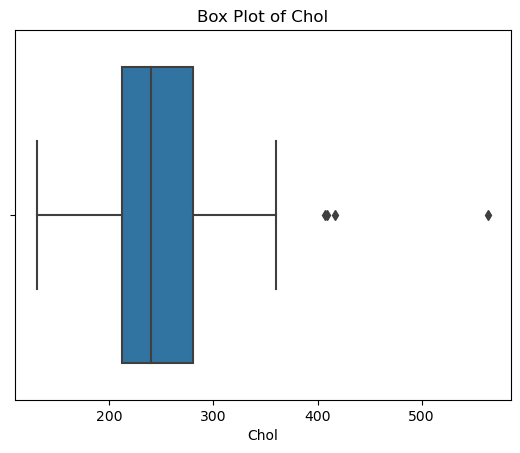

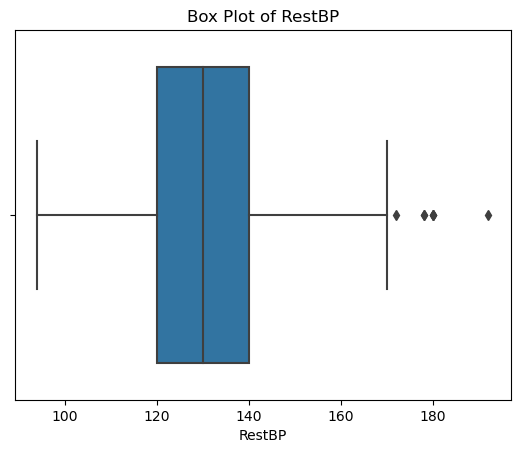

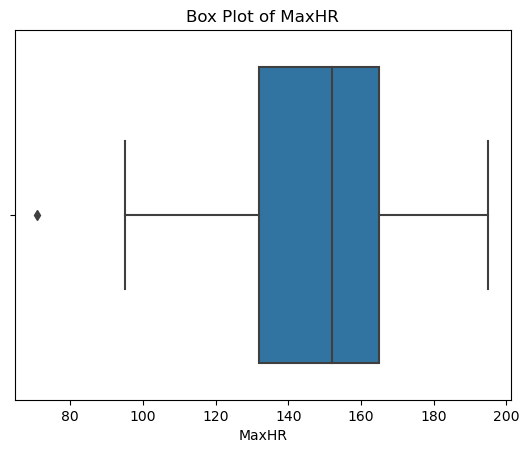

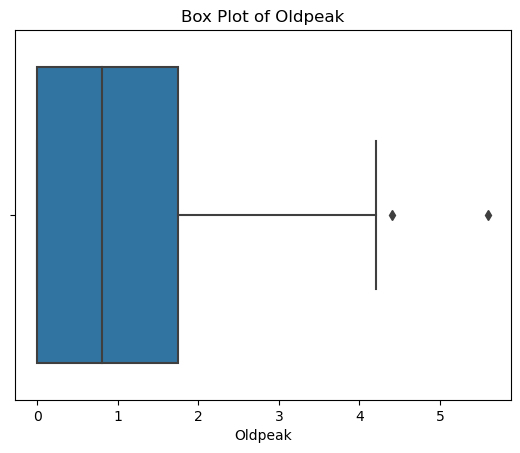

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for numerical features
numerical_features = ['Chol', 'RestBP', 'MaxHR','Oldpeak']
for feature in numerical_features:
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [14]:
# Select the categorical columns to one-hot encode
categorical_cols = ['ChestPain', 'Thal'] # 'Fbs', 'RestECG', 'ExAng', 'Slope', 'Ca'

# Use pandas.get_dummies() to one-hot encode the categorical columns
df = pd.get_dummies(df, columns=categorical_cols)


In [15]:
df

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,49,1,118,149,0,2,126,0,0.8,1,3.0,1,0,1,0,0,0,1,0
1,63,0,108,269,0,0,169,1,1.8,2,2.0,1,1,0,0,0,0,1,0
2,59,1,160,273,0,2,125,0,0.0,1,0.0,1,0,0,0,1,0,1,0
3,59,1,140,177,0,0,162,1,0.0,1,1.0,1,1,0,0,0,0,0,1
4,47,1,108,243,0,0,152,0,0.0,1,0.0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,42,0,102,265,0,2,122,0,0.6,2,0.0,0,1,0,0,0,0,1,0
311,51,1,110,175,0,0,123,0,0.6,1,0.0,0,0,1,0,0,0,1,0
312,43,0,132,341,1,2,136,1,3.0,2,0.0,1,1,0,0,0,0,0,1
313,63,1,140,187,0,2,144,1,4.0,1,2.0,1,1,0,0,0,0,0,1


In [66]:
# select features
X_train= df.loc[:, df.columns != 'AHD']  

y_train= df.loc[:, df.columns == 'AHD'] 

In [67]:
X_train.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,49,1,118,149,0,2,126,0,0.8,1,3.0,0,1,0,0,0,1,0
1,63,0,108,269,0,0,169,1,1.8,2,2.0,1,0,0,0,0,1,0
2,59,1,160,273,0,2,125,0,0.0,1,0.0,0,0,0,1,0,1,0
3,59,1,140,177,0,0,162,1,0.0,1,1.0,1,0,0,0,0,0,1
4,47,1,108,243,0,0,152,0,0.0,1,0.0,0,1,0,0,0,1,0


In [19]:
?tree.DecisionTreeClassifier

In [68]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion="gini", max_depth=5)

In [69]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [59]:
pip install upgrade sklearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade


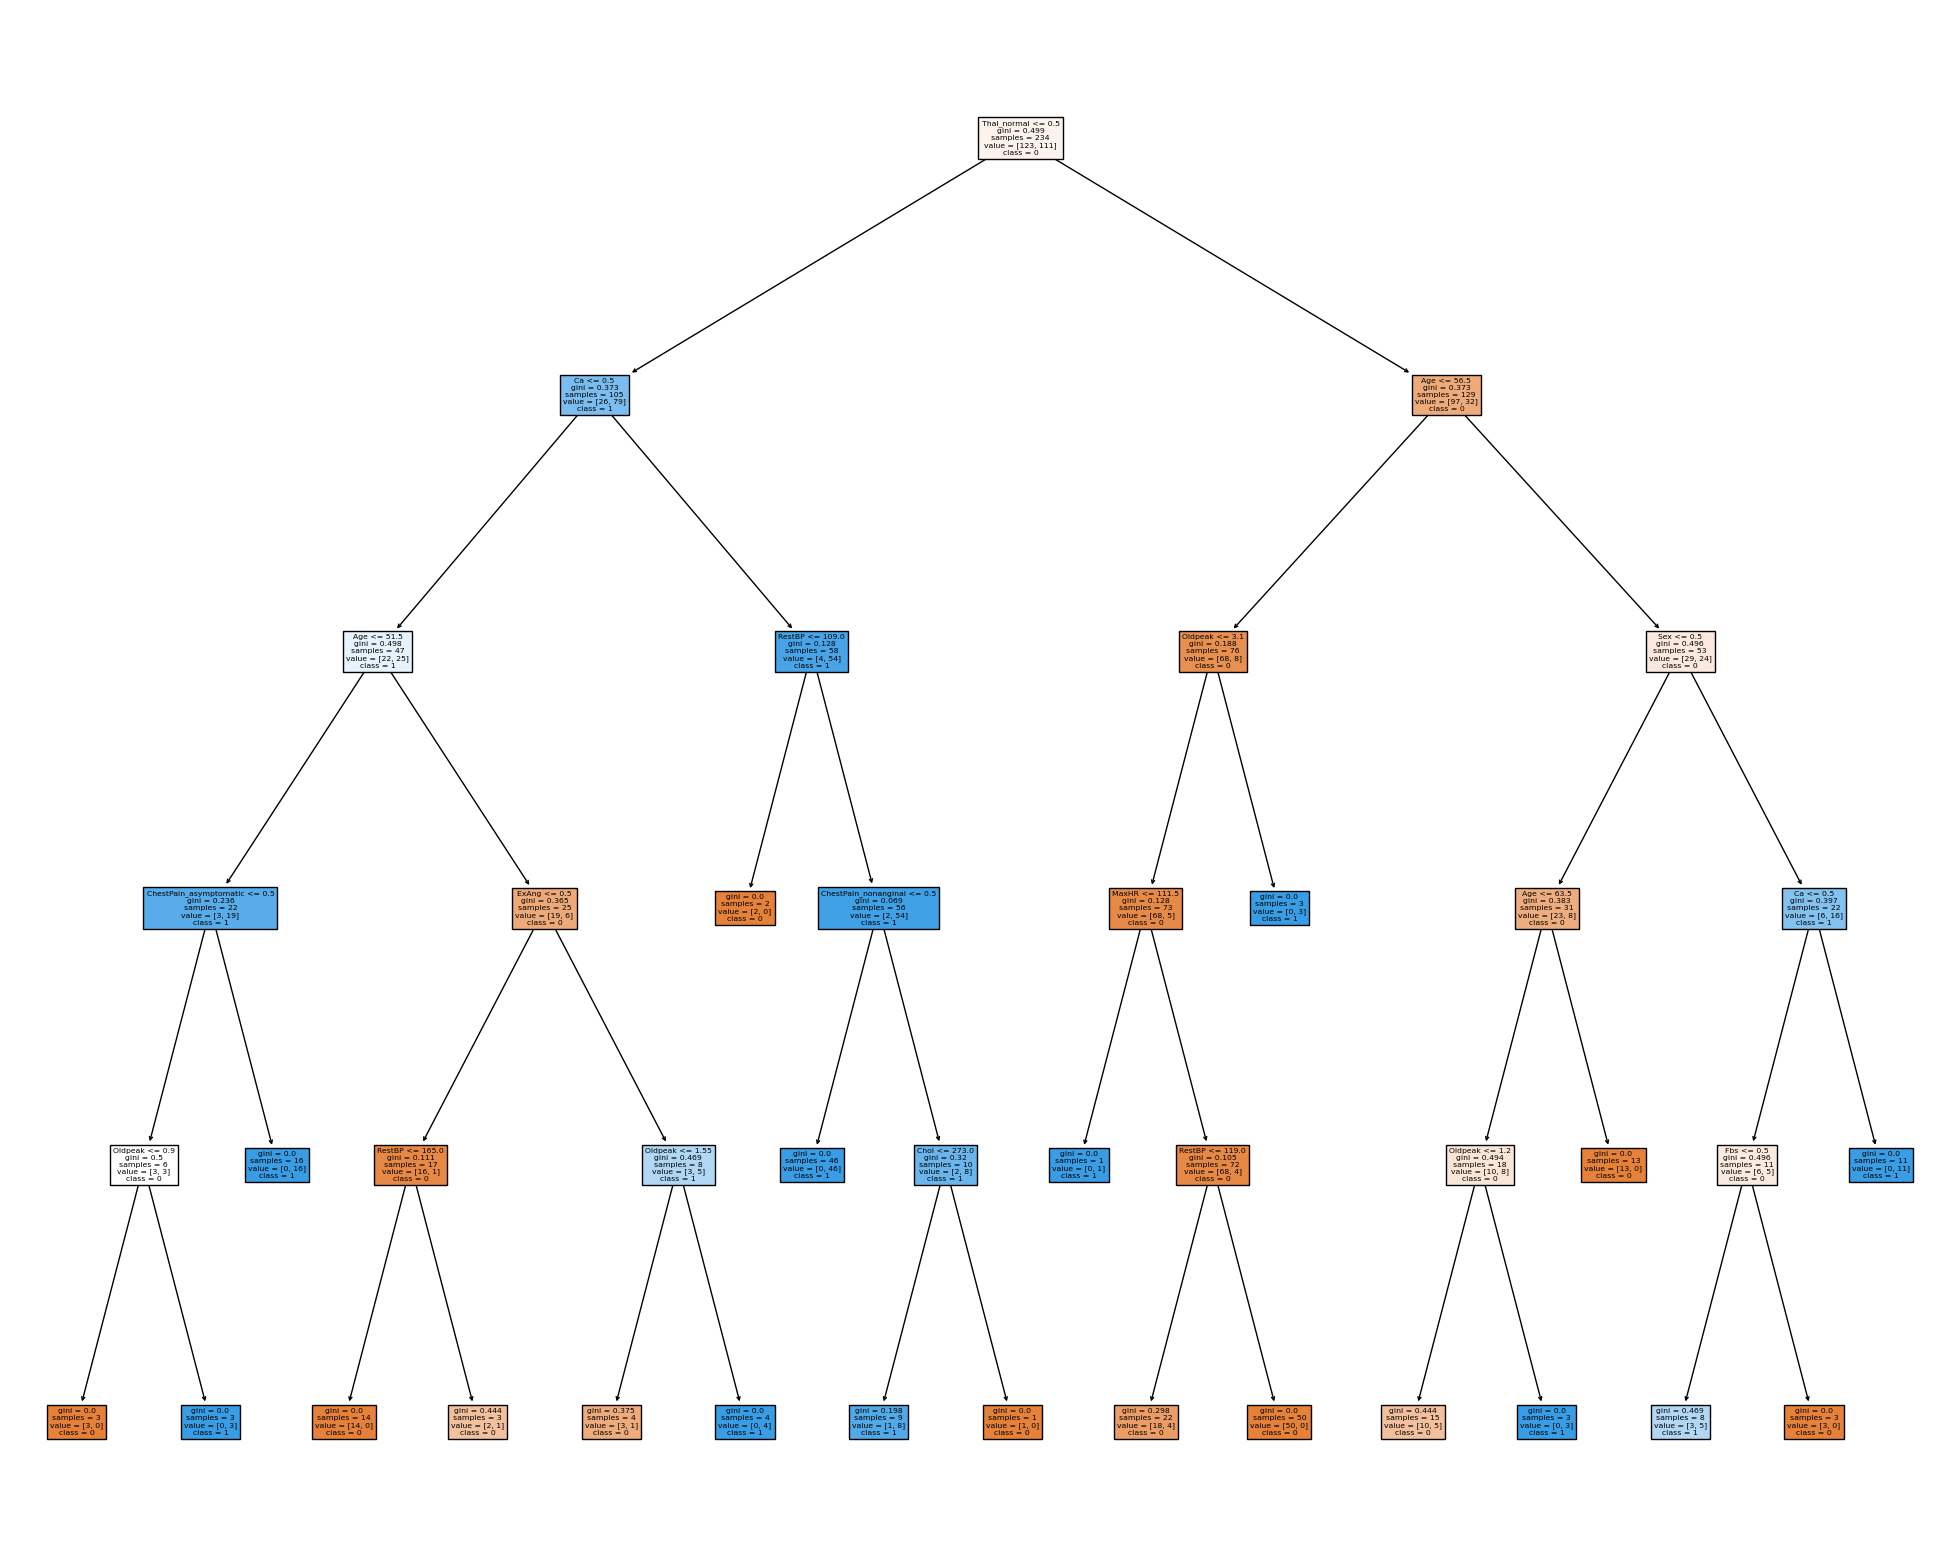

In [70]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=X_train.columns,  
                   class_names=['0','1'],
                   filled=True)

In [71]:
y_train_pred_class = dtree.predict(X_train)

In [72]:
from sklearn.metrics import confusion_matrix
def draw_cm( actual, predicted ):
        cm = confusion_matrix( actual, predicted)
        sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = [0,1] , yticklabels = [0,1] )
        plt.ylabel('Observed')
        plt.xlabel('Predicted')
        plt.show()

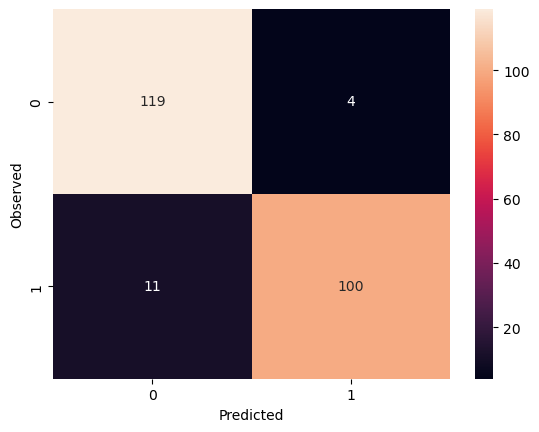

In [74]:
draw_cm(y_train,y_train_pred_class)

In [39]:
# Predictions on Test Data Set
# load the data
df_test = pd.read_csv(r'C:\Users\soory\Downloads\images\testData.csv')
df_test.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
1,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2,normal,Yes
2,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0,reversable,Yes
3,57,1,asymptomatic,140,192,0,0,148,0,0.4,2,0,fixed,No
4,56,1,nonanginal,130,256,1,2,142,1,0.6,2,1,fixed,Yes


In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        137 non-null    int64  
 1   Sex        137 non-null    int64  
 2   ChestPain  137 non-null    object 
 3   RestBP     137 non-null    int64  
 4   Chol       137 non-null    int64  
 5   Fbs        137 non-null    int64  
 6   RestECG    137 non-null    int64  
 7   MaxHR      137 non-null    int64  
 8   ExAng      137 non-null    int64  
 9   Oldpeak    137 non-null    float64
 10  Slope      137 non-null    int64  
 11  Ca         137 non-null    int64  
 12  Thal       137 non-null    object 
 13  AHD        137 non-null    object 
dtypes: float64(1), int64(10), object(3)
memory usage: 15.1+ KB


In [41]:
df_test['AHD']=df_test['AHD'].apply(lambda x : 1 if x=='Yes' else 0)

In [42]:
df_test

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,0
1,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2,normal,1
2,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0,reversable,1
3,57,1,asymptomatic,140,192,0,0,148,0,0.4,2,0,fixed,0
4,56,1,nonanginal,130,256,1,2,142,1,0.6,2,1,fixed,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,67,0,nonanginal,115,564,0,2,160,0,1.6,2,0,reversable,0
133,50,1,nonanginal,129,196,0,0,163,0,0.0,1,0,normal,0
134,53,1,asymptomatic,142,226,0,2,111,1,0.0,1,0,reversable,0
135,64,1,asymptomatic,145,212,0,2,132,0,2.0,2,2,fixed,1


In [43]:
print(df_test.columns)

Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')


In [44]:
categorical_cols = ['ChestPain', 'Thal'] # 'Fbs', 'RestECG', 'ExAng', 'Slope', 'Ca'

# Use pandas.get_dummies() to one-hot encode the categorical columns
df_test = pd.get_dummies(df_test, columns=categorical_cols)


In [31]:
df_test

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,37,1,130,250,0,0,187,0,3.5,3,0,0,0,1,0,0,0,1,0
1,62,0,140,268,0,2,160,0,3.6,3,2,1,1,0,0,0,0,1,0
2,53,1,140,203,1,2,155,1,3.1,3,0,1,1,0,0,0,0,0,1
3,57,1,140,192,0,0,148,0,0.4,2,0,0,1,0,0,0,1,0,0
4,56,1,130,256,1,2,142,1,0.6,2,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,67,0,115,564,0,2,160,0,1.6,2,0,0,0,1,0,0,0,0,1
133,50,1,129,196,0,0,163,0,0.0,1,0,0,0,1,0,0,0,1,0
134,53,1,142,226,0,2,111,1,0.0,1,0,0,1,0,0,0,0,0,1
135,64,1,145,212,0,2,132,0,2.0,2,2,1,1,0,0,0,1,0,0


In [75]:
X_test= df_test.loc[:, df_test.columns != 'AHD']  

y_test= df_test.loc[:, df_test.columns == 'AHD'] 

In [76]:
dtree.score(X_train,y_train)

0.9358974358974359

In [77]:
dtree.score(X_test,y_test)

0.8248175182481752

In [78]:
y_test_pred_class = dtree.predict(X_test)

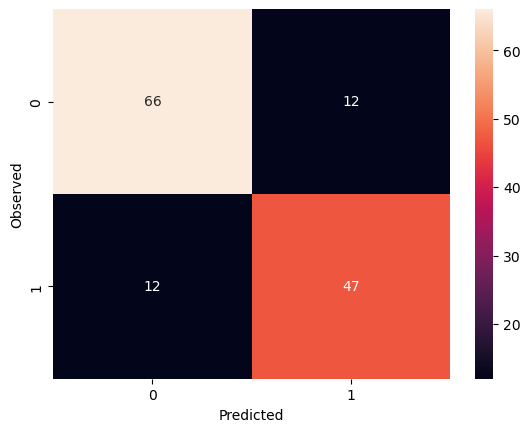

In [79]:
draw_cm(y_test,y_test_pred_class)